## Observations and Insights

1. They do more experiments of Capomulin and Ramicane regimen. The number of male mouse and female mouse is almost the same.
2. There is one outlier in Infubinol regimen, and the boxplot shows that most mice had bigger tumor after the period of the experiment, but only one had smaller tumor.
3. Capomulin regimen is helpful to decrease the tumor volume. The correlation coefficient between mouse weight and tumor volume is 0.84, which means they have very strong positive correlation. 

## Dependencies and starter code

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_data = combine_data.groupby(["Drug Regimen"])
summary_data = regimen_data.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_data = summary_data.rename(columns={"var":"variance", "std":"standard deviation", "sem":"standard error"})
summary_data

Tumor Volume (mm3)                                           \
                           mean     median   variance standard deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                             
             standard error  
Drug Regimen                 
Capomulin          0.329346  
Ceftamin           0.469821  
Infubinol          0.492236  
Ketapril           0.603860  
Naftisol           0.596466  
Placebo            0.581331  
Propriva           0.512884  
Ramicane           0.320955  
Stelasyn           0.573111  
Zoniferol          0.516398

## Bar plots

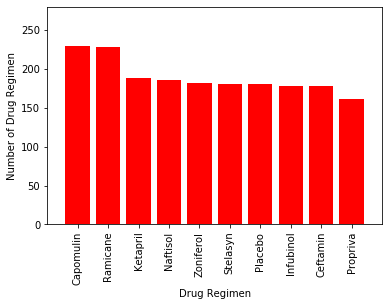

In [41]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_number = combine_data["Drug Regimen"].value_counts()
regimen_number.plot(kind="bar", color="r", width=0.8)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Drug Regimen")
plt.xlim(-1, len(regimen_number))
plt.ylim(0, max(regimen_number)+50)
plt.show()

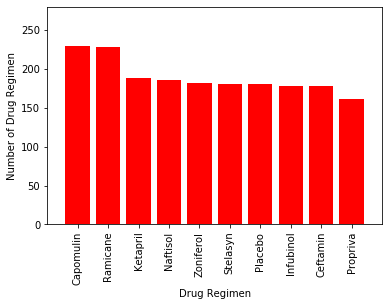

In [42]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_number = combine_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(regimen_number))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, regimen_number, color="r", width=0.8)
plt.xticks(tick_locations, regimen_number.index, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Drug Regimen")
plt.xlim(-1, len(regimen_number))
plt.ylim(0, max(regimen_number)+50)
plt.show()

## Pie plots

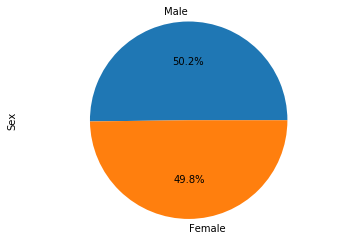

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_number = mouse_metadata["Sex"].value_counts()
sex_number.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.show()

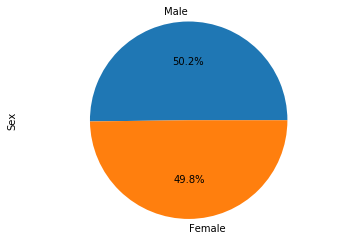

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_number = mouse_metadata["Sex"].value_counts()
plt.pie(sex_number, labels=sex_number.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Group the dataframe by Mouse ID, then get max of every column to get max time point, but tumor volume here is not right.
grouped_id = combine_data.groupby(["Mouse ID"])
max_timepoint = grouped_id.max()

# Reset the index to make Mouse ID as column name
max_timepoint = max_timepoint.reset_index()

# As the tumor volume above shown is not right, merge the dataframe with the original dataframe to get the right data
merge_max_timepoint = pd.merge(max_timepoint, combine_data, how="left", on=["Mouse ID","Timepoint"], suffixes=("_notuse",""))

# Get the final tumor volume of four treatment regimens
capomulin = merge_max_timepoint.loc[merge_max_timepoint["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
ramicane = merge_max_timepoint.loc[merge_max_timepoint["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
infubinol = merge_max_timepoint.loc[merge_max_timepoint["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
ceftamin = merge_max_timepoint.loc[merge_max_timepoint["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]


In [46]:
# Calculate the IQR of Capomulin and quantitatively determine if there are any potential outliers.
capomulin_quar = capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quar[0.25]
capomulin_upperq = capomulin_quar[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
c_lower_bound = capomulin_lowerq - 1.5*capomulin_iqr
c_upper_bound = capomulin_upperq + 1.5*capomulin_iqr

num = 0
for value in capomulin:
    if value < c_lower_bound or value > c_upper_bound:
        print(f"Capomulin has outlier: {value}")
        num = 1

if num == 0:
    print("No outlier.")        

No outlier.


In [47]:
# Calculate the IQR of Ramicane and quantitatively determine if there are any potential outliers.
ramicane_quar = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quar[0.25]
ramicane_upperq = ramicane_quar[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
r_lower_bound = ramicane_lowerq - 1.5*ramicane_iqr
r_upper_bound = ramicane_upperq + 1.5*ramicane_iqr

num = 0
for value in ramicane:
    if value < r_lower_bound or value > r_upper_bound:
        print(f"Ramicane has outlier: {value}")
        num = 1
        
if num == 0:
    print("No outlier.")

No outlier.


In [48]:
# Calculate the IQR of Infubinol and quantitatively determine if there are any potential outliers.
infub_quar = infubinol.quantile([.25,.5,.75])
infub_lowerq = infub_quar[0.25]
infub_upperq = infub_quar[0.75]
infub_iqr = infub_upperq-infub_lowerq
i_lower_bound = infub_lowerq - 1.5*infub_iqr
i_upper_bound = infub_upperq + 1.5*infub_iqr

num = 0
for value in infubinol:
    if value <i_lower_bound or value > i_upper_bound:
        print(f"Infubinol has outlier: {value}")
        num = 1
        
if num == 0:
    print("No outlier.")

Infubinol has outlier: 36.321345799999996


In [49]:
# Calculate the IQR of Ceftamin and quantitatively determine if there are any potential outliers.
ceft_quar = ceftamin.quantile([.25,.5,.75])
ceft_lowerq = ceft_quar[0.25]
ceft_upperq = ceft_quar[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq
ce_lower_bound = ceft_lowerq - 1.5*ceft_iqr
ce_upper_bound = ceft_upperq + 1.5*ceft_iqr

num = 0
for value in ceftamin:
    if value <ce_lower_bound or value > ce_upper_bound:
        print(f"Ceftamin has outlier: {value}")
        num = 1
        
if num == 0:
    print("No outlier.")

No outlier.


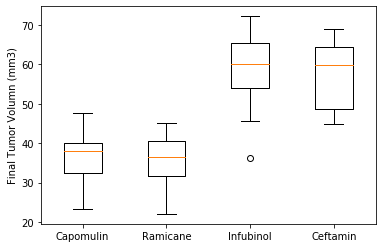

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel("Final Tumor Volumn (mm3)")
plt.show()

## Line and scatter plots

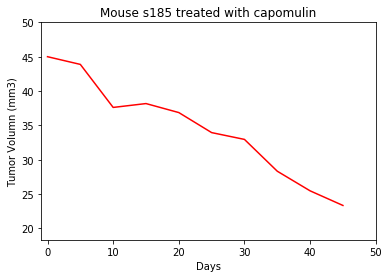

In [51]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = combine_data.loc[combine_data["Drug Regimen"]=="Capomulin"]

# Pick up a random mouse ID: s185 to generate a line plot
cap_mouse = cap_df.loc[cap_df["Mouse ID"]=="s185"]
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"], color='r')
plt.title("Mouse s185 treated with capomulin")
plt.xlabel("Days")
plt.ylabel("Tumor Volumn (mm3)")
plt.xlim(-1, 50)
plt.ylim(cap_mouse["Tumor Volume (mm3)"].min()-5, cap_mouse["Tumor Volume (mm3)"].max()+5)
plt.show()

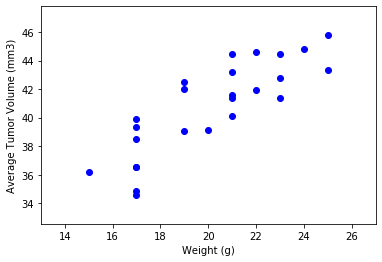

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse_ave = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(cap_mouse_ave["Weight (g)"], cap_mouse_ave["Tumor Volume (mm3)"], marker="o", facecolors="b")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(cap_mouse_ave["Weight (g)"].min()-2, cap_mouse_ave["Weight (g)"].max()+2)
plt.ylim(cap_mouse_ave["Tumor Volume (mm3)"].min()-2, cap_mouse_ave["Tumor Volume (mm3)"].max()+2)
plt.show()

The correlation coefficient for mouse weight and average tumor volume is 0.84


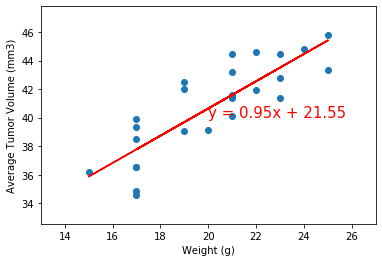

In [53]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_ave["Weight (g)"], cap_mouse_ave["Tumor Volume (mm3)"])
print(f"The correlation coefficient for mouse weight and average tumor volume is {round(correlation[0],2)}")

# Create linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_mouse_ave["Weight (g)"]
y_values = cap_mouse_ave["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(cap_mouse_ave["Weight (g)"].min()-2, cap_mouse_ave["Weight (g)"].max()+2)
plt.ylim(cap_mouse_ave["Tumor Volume (mm3)"].min()-2, cap_mouse_ave["Tumor Volume (mm3)"].max()+2)
plt.show()